In [1]:
%reload_ext autoreload
%autoreload 2

In [37]:
# importing liberaries 
import missingno as msno 
import matplotlib.pyplot as plt 
import pandas as pd
from sqlalchemy import create_engine
import sys 
import os 
import numpy as np 
import seaborn as sns 
import sys, os
import sklearn
from sklearn.decomposition import PCA
import logging
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



In [38]:
df_cleaned = pd.read_csv('/home/hp/10academy/10telecom/useranalyst.csv')

In [39]:

# to aggregate per user information

#aggregate per user information 
aggregated_data = df_cleaned.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',  # Counting the number of sessions
    'Dur. (ms)': 'sum',  # Total session duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
    
}).reset_index()
aggregated_data.head()  # Display the first few rows




,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,116720.0,36053108.0,8.426375e+08
1,3.360100e+10,181230.0,36104459.0,1.207552e+08
2,3.360100e+10,134969.0,39306820.0,5.566597e+08
3,3.360101e+10,49878.0,20327526.0,4.019932e+08
4,3.360101e+10,37104.0,94280527.0,1.363130e+09


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df_cleaned' contains the necessary columns like 'MSISDN/Number', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)'


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df_cleaned' contains the necessary columns like 'MSISDN/Number', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)'

# Aggregate per user information
customer_engagement = df_cleaned.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count', 'sum'],  # Counting the number of sessions and summing the duration
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',
})

# Flatten the multi-level column index after aggregation
customer_engagement.columns = ['SessionCount', 'TotalDuration', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Display the aggregated data
print(customer_engagement.head(10))

# Normalize engagement metrics
normalized_engagement = (customer_engagement - customer_engagement.min()) / (customer_engagement.max() - customer_engagement.min())

# Get top 10 customers per engagement metric
top_10_engaged_customers = {
    'Dur. (ms) Count': normalized_engagement.nlargest(10, 'SessionCount').index,
    'Dur. (ms) Sum': normalized_engagement.nlargest(10, 'TotalDuration').index,
    'Total UL (Bytes)': normalized_engagement.nlargest(10, 'Total UL (Bytes)').index,
    'Total DL (Bytes)': normalized_engagement.nlargest(10, 'Total DL (Bytes)').index
}
top_10_sessioncount_engaged_customers = normalized_engagement.nlargest(10, 'SessionCount').index
# Plotting top 10 engaged customers per metric

print(top_10_sessioncount_engaged_customers)
# Print the top 10 engaged customers per metric
print("Top 10 Customers per Engagement Metric:")
print(top_10_engaged_customers)









               SessionCount  TotalDuration  Total UL (Bytes)  Total DL (Bytes)
MSISDN/Number                                                                 
3.360100e+10              1       116720.0        36053108.0      8.426375e+08
3.360100e+10              1       181230.0        36104459.0      1.207552e+08
3.360100e+10              1       134969.0        39306820.0      5.566597e+08
3.360101e+10              1        49878.0        20327526.0      4.019932e+08
3.360101e+10              2        37104.0        94280527.0      1.363130e+09
3.360101e+10              2       253983.0        60009249.0      5.552080e+08
3.360101e+10              2       128360.0       101681858.0      5.530412e+08
3.360101e+10              1        86399.0        38575279.0      2.940851e+08
3.360101e+10              2       495702.0        93572016.0      8.965602e+08
3.360102e+10              1       124854.0        47091008.0      6.853728e+08
Index([33626320676.0, 33614892860.0, 33625779332.0, 

In [41]:

# Compute session frequency for each user
session_frequency = df_cleaned['MSISDN/Number'].value_counts()
session_frequency

MSISDN/Number
3.362632e+10    18
3.361489e+10    17
3.362578e+10    17
3.365973e+10    16
3.376054e+10    15
                ..
3.366068e+10     1
3.364517e+10     1
3.365821e+10     1
3.366338e+10     1
3.361962e+10     1
Name: count, Length: 106856, dtype: int64

In [42]:
# Compute session duration for each user
average_session_duration = df_cleaned.groupby('MSISDN/Number')['Dur. (ms)'].mean()
average_session_duration

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     18552.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

In [43]:
# Calculate total traffic (download and upload) for each user
df_cleaned['Total_Traffic'] = df_cleaned['Total UL (Bytes)'] + df_cleaned['Total DL (Bytes)']
total_traffic_per_user = df_cleaned.groupby('MSISDN/Number')['Total_Traffic'].sum()
total_traffic_per_user


MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    7.146416e+08
3.379000e+10    4.803073e+08
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: Total_Traffic, Length: 106856, dtype: float64

In [44]:
# Combine the metrics into a single DataFrame
engagement_metrics = pd.DataFrame({
    'Session_Frequency': session_frequency,
    'Average_Session_Duration': average_session_duration,
    'Total_Traffic': total_traffic_per_user
}).reset_index()

# Display or use the resulting engagement metrics DataFrame
engagement_metrics.head()

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
0,3.360100e+10,1,116720.0,8.786906e+08
1,3.360100e+10,1,181230.0,1.568596e+08
2,3.360100e+10,1,134969.0,5.959665e+08
3,3.360101e+10,1,49878.0,4.223207e+08
4,3.360101e+10,2,18552.0,1.457411e+09


In [45]:
# Rename columns for clarity
#customer_engagement.columns = ['Session_Frequency', 'Average_Session_Duration', 'Total_Traffic']

In [46]:

top_10_session_frequency = engagement_metrics.nlargest(10, 'Session_Frequency')
top_10_session_frequency

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
13526,3.362632e+10,18,4.884404e+05,7.971167e+09
6437,3.361489e+10,17,5.862881e+05,8.846226e+09
13180,3.362578e+10,17,1.091397e+06,8.499621e+09
37052,3.365973e+10,16,2.522142e+05,7.705863e+09
76363,3.367588e+10,15,3.243965e+05,7.891111e+09
92923,3.376054e+10,15,6.186289e+05,8.514774e+09
65118,3.366716e+10,13,6.726857e+05,5.618394e+09
666,3.360313e+10,12,5.239801e+05,4.976195e+09
1279,3.360452e+10,12,4.339992e+05,5.487855e+09
13994,3.362708e+10,12,3.919597e+05,5.754731e+09


In [47]:
top_10_avg_duration = engagement_metrics.nlargest(10, 'Average_Session_Duration')
top_10_avg_duration

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
71556,3.366926e+10,1,1573420.0,3.704210e+08
45295,3.366172e+10,1,1480875.0,3.567835e+08
1998,3.360750e+10,1,1474663.0,1.770069e+08
98076,3.376260e+10,1,1375612.0,5.731594e+08
93144,3.376063e+10,1,1361762.0,3.076910e+08
95896,3.376167e+10,1,1357643.0,7.809365e+08
90405,3.375034e+10,1,1321509.0,8.893527e+08
64083,3.366682e+10,1,1299381.0,2.293477e+08
86133,3.369870e+10,4,1209607.0,1.425854e+09
15898,3.363050e+10,1,1177517.0,2.234732e+08


In [48]:
top_10_total_traffic = engagement_metrics.nlargest(10, 'Total_Traffic')
top_10_total_traffic

,MSISDN/Number,Session_Frequency,Average_Session_Duration,Total_Traffic
6437,3.361489e+10,17,5.862881e+05,8.846226e+09
92923,3.376054e+10,15,6.186289e+05,8.514774e+09
13180,3.362578e+10,17,1.091397e+06,8.499621e+09
13526,3.362632e+10,18,4.884404e+05,7.971167e+09
76363,3.367588e+10,15,3.243965e+05,7.891111e+09
37052,3.365973e+10,16,2.522142e+05,7.705863e+09
63028,3.366646e+10,11,4.124325e+05,7.308501e+09
92577,3.376041e+10,12,4.434722e+05,7.132371e+09
57241,3.366471e+10,11,2.661623e+05,6.872018e+09
86455,3.369879e+10,11,4.699207e+05,6.540899e+09


In [50]:
# Normalize engagement metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics.drop('MSISDN/Number', axis=1))
normalized_metrics

array([[0.        , 0.06996076, 0.09593143],
       [0.        , 0.11114757, 0.01402598],
       [0.        , 0.08161195, 0.06385101],
       ...,
       [0.        , 0.55561209, 0.02256615],
       [0.        , 0.15698873, 0.06388747],
       [0.        , 0.5507975 , 0.0120169 ]])

In [51]:
# Run K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)
# Compute statistics for each cluster
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Session_Frequency': ['min', 'max', 'mean', 'sum'],
    'Average_Session_Duration': ['min', 'max', 'mean', 'sum'],
    'Total_Traffic': ['min', 'max', 'mean', 'sum']
}).reset_index()
cluster_stats

Cluster Session_Frequency                      Average_Session_Duration  \
                        min max      mean    sum                      min   
0       0                 2  18  2.745615  47425                   9117.5   
1       1                 1   4  1.105510  27609                 128329.0   
2       2                 1   3  1.143819  73901                   7142.0   

                                             Total_Traffic                \
            max           mean           sum           min           max   
0  1.091397e+06  102701.264510  1.773959e+09   474595196.0  8.846226e+09   
1  1.573420e+06  189729.218340  4.738297e+09    33575840.0  1.847841e+09   
2  1.322870e+05   69050.807625  4.461304e+09    33249009.0  1.078981e+09   

                               
           mean           sum  
0  1.532786e+09  2.647582e+13  
1  5.247348e+08  1.310473e+13  
2  5.301568e+08  3.425290e+13

In [52]:
# Aggregate user total traffic per application
app_traffic = df_cleaned.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Google DL (Bytes)', 
                                             'Email DL (Bytes)', 'Youtube DL (Bytes)',
                                             'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                                             'Other DL (Bytes)']].sum()
app_traffic

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
MSISDN/Number,,,,,,,
3.360100e+10,2206504.0,3337123.0,837400.0,14900201.0,10265105.0,8.110911e+08,377096990.0
3.360100e+10,2598548.0,4197697.0,2828821.0,5324251.0,770569.0,1.050353e+08,279557701.0
3.360100e+10,3148004.0,3343483.0,2436500.0,2137272.0,16525919.0,5.290685e+08,495086501.0
3.360101e+10,251469.0,5937765.0,2178618.0,4393123.0,1157362.0,3.880748e+08,25248001.0
3.360101e+10,2861230.0,13728668.0,2247808.0,10339971.0,24971647.0,1.308981e+09,777643713.0
...,...,...,...,...,...,...,...
3.379000e+10,234320.0,6834178.0,480946.0,8294310.0,14754741.0,6.573267e+08,291391283.0
3.379000e+10,442214.0,1472406.0,2513433.0,5596862.0,6929961.0,4.276202e+08,204636073.0
3.197021e+12,668596.0,8572779.0,842279.0,9839889.0,10340908.0,1.645636e+08,467678100.0


In [53]:
# Calculate total traffic per user for each application
app_traffic['Total_App_Traffic'] = app_traffic.sum(axis=1)


In [54]:
top_10_social_media = app_traffic.nlargest(10, 'Social Media DL (Bytes)')
top_10_social_media

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total_App_Traffic
MSISDN/Number,,,,,,,,
3.362632e+10,42743837.0,116106455.0,33404785.0,164048706.0,199479238.0,6.745734e+09,8.025477e+09,1.532699e+10
3.376054e+10,39297646.0,88626532.0,26437895.0,194068298.0,146500839.0,7.316364e+09,4.590038e+09,1.240133e+10
3.365973e+10,34900444.0,90958549.0,29907647.0,119658146.0,196277206.0,6.609900e+09,6.182551e+09,1.326415e+10
3.361489e+10,27749744.0,93941708.0,33607211.0,199823443.0,179585986.0,7.622035e+09,7.495298e+09,1.565204e+10
3.362578e+10,26564121.0,107904739.0,31895412.0,237883033.0,193912238.0,7.171884e+09,6.201653e+09,1.397170e+10
3.366716e+10,23753753.0,71707826.0,23276752.0,141972692.0,167932406.0,4.623424e+09,4.837534e+09,9.889601e+09
3.378632e+10,23568655.0,78819810.0,30876908.0,118129859.0,163602702.0,4.740903e+09,4.172594e+09,9.328496e+09
3.366907e+10,23477047.0,54915216.0,17813584.0,136295265.0,78923699.0,3.166462e+09,4.540939e+09,8.018826e+09
3.360313e+10,22776679.0,73942055.0,20343728.0,158976704.0,156086546.0,4.108482e+09,6.222705e+09,1.076331e+10


In [55]:
top_10_google = app_traffic.nlargest(10, 'Google DL (Bytes)')
top_10_google

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total_App_Traffic
MSISDN/Number,,,,,,,,
3.362632e+10,42743837.0,116106455.0,33404785.0,164048706.0,199479238.0,6.745734e+09,8.025477e+09,1.532699e+10
3.362578e+10,26564121.0,107904739.0,31895412.0,237883033.0,193912238.0,7.171884e+09,6.201653e+09,1.397170e+10
3.361489e+10,27749744.0,93941708.0,33607211.0,199823443.0,179585986.0,7.622035e+09,7.495298e+09,1.565204e+10
3.365973e+10,34900444.0,90958549.0,29907647.0,119658146.0,196277206.0,6.609900e+09,6.182551e+09,1.326415e+10
3.376054e+10,39297646.0,88626532.0,26437895.0,194068298.0,146500839.0,7.316364e+09,4.590038e+09,1.240133e+10
3.367588e+10,18655364.0,83002994.0,24284723.0,158665235.0,161626462.0,6.863307e+09,6.665074e+09,1.397462e+10
3.378632e+10,23568655.0,78819810.0,30876908.0,118129859.0,163602702.0,4.740903e+09,4.172594e+09,9.328496e+09
3.360313e+10,22776679.0,73942055.0,20343728.0,158976704.0,156086546.0,4.108482e+09,6.222705e+09,1.076331e+10
3.376127e+10,14201427.0,72949803.0,15768841.0,119056471.0,167261139.0,4.165410e+09,4.997985e+09,9.552632e+09


In [56]:
top_10_youtube = app_traffic.nlargest(10, 'Youtube DL (Bytes)')
top_10_youtube 

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Total_App_Traffic
MSISDN/Number,,,,,,,,
3.362578e+10,26564121.0,107904739.0,31895412.0,237883033.0,193912238.0,7.171884e+09,6.201653e+09,1.397170e+10
3.361489e+10,27749744.0,93941708.0,33607211.0,199823443.0,179585986.0,7.622035e+09,7.495298e+09,1.565204e+10
3.376054e+10,39297646.0,88626532.0,26437895.0,194068298.0,146500839.0,7.316364e+09,4.590038e+09,1.240133e+10
3.362708e+10,17438671.0,62722401.0,17353955.0,187323322.0,144623204.0,4.880017e+09,5.039747e+09,1.034923e+10
3.376041e+10,20515774.0,56331853.0,21791296.0,174245981.0,167023809.0,6.170943e+09,3.988504e+09,1.059936e+10
3.369879e+10,15390784.0,59943992.0,24165599.0,166900329.0,103027247.0,5.641128e+09,4.598153e+09,1.060871e+10
3.362632e+10,42743837.0,116106455.0,33404785.0,164048706.0,199479238.0,6.745734e+09,8.025477e+09,1.532699e+10
3.360313e+10,22776679.0,73942055.0,20343728.0,158976704.0,156086546.0,4.108482e+09,6.222705e+09,1.076331e+10
3.367588e+10,18655364.0,83002994.0,24284723.0,158665235.0,161626462.0,6.863307e+09,6.665074e+09,1.397462e+10


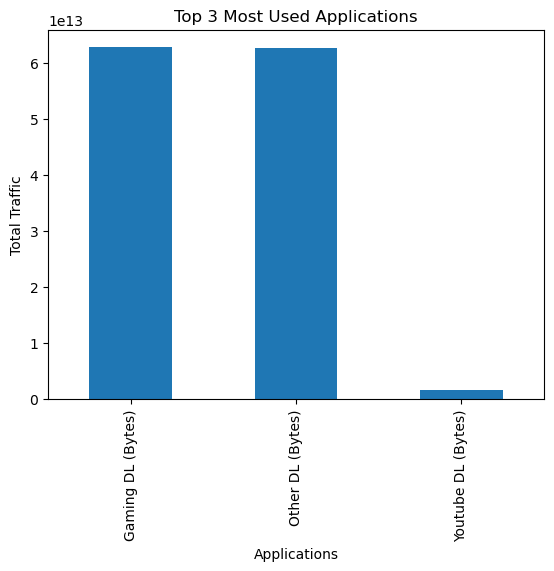

In [57]:
# Calculate total traffic per application across all users
total_app_traffic = app_traffic.drop('Total_App_Traffic', axis=1).sum()

# Plot top 3 most used applications
top_3_apps = total_app_traffic.nlargest(3)
top_3_apps.plot(kind='bar', xlabel='Applications', ylabel='Total Traffic', title='Top 3 Most Used Applications')
plt.show()

/home/hp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hp/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

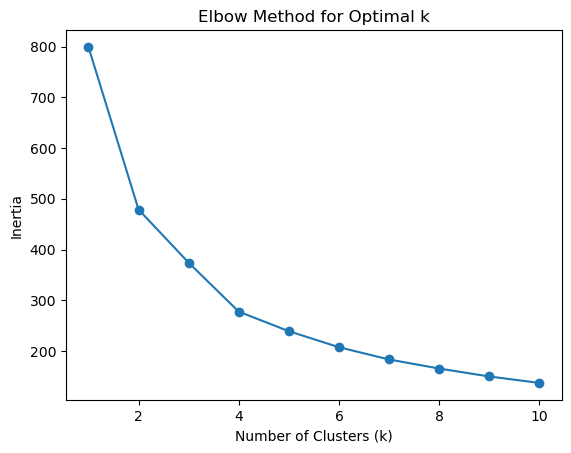

In [58]:
# Elbow method to find optimized k value
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia_values.append(kmeans.inertia_)

# Plot inertia values for different k values
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
